# 1. Leaky-integrate-and-fire model, Book Exercise-1(we are using existing LIF module, by changing parameters and to see their observation results)
Book chapters

See Chapter 1 Section 3 on general information about leaky-integrate-and-fire models.

Python classes 
**
# The leaky_integrate_and_fire.LIF implements a parameterizable LIF model. Call LIF.getting_started() and have a look at it’s source code to learn how to efficiently use the leaky_integrate_and_fire.LIF module**

A typical Jupyter notebook looks like this:
#print("nr of spikes: {}".format(spike_monitor.count[0]))

In [ ]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

LIF.getting_started()
LIF.print_default_parameters()

: 

Note that you can change all parameter of the LIF neuron by using the named parameters of the function simulate_LIF_neuron(). If you do not specify any parameter, the following default values are used:

V_REST = -70*b2.mV
V_RESET = -65*b2.mV
FIRING_THRESHOLD = -50*b2.mV
MEMBRANE_RESISTANCE = 10. * b2.Mohm
MEMBRANE_TIME_SCALE = 8. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

1.1. Exercise: minimal current
**In the absence of an input current, a LIF neuron has a constant membrane voltage V_REST.** If an input current drives vm above the firing threshold, a spike is generated. Then, vm is reset to V_RESET and the neuron ignores any input during the refractroy period.

1.1.1. Question: minimal current (calculation)
For the default neuron parameters (see above), compute the minimal amplitude Imin
 of a step current to elicitate a spike. You can access the default values in your code and do the calculation with correct units:

In [ ]:
from neurodynex3.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))

: 

1.1.2. Question: minimal current (simulation)
Use the value Imin
 you’ve computed and verify your result: inject a step current of amplitude Imin
 for 100ms into the LIF neuron and plot the membrane voltage. vm should approach the firing threshold but not fire. We have implemented a couple of helper functions to solve this task. Use this code block, but make sure you understand it and you’ve read the docs of the functions LIF.simulate_LIF_neuron(), input_factory.get_step_current() and plot_tools.plot_voltage_and_current_traces().

**we have given a own step input current**
**(we have plotted voltage_and_current_traces)**

In [ ]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

# create a step current with amplitude = I_min
I_min= 1.2 * b2.namp
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude=I_min)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm 
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

: 

Creates a range of input currents from I_min to I_max.
Simulates the LIF neuron for each input current.
Calculates the firing rate as the number of spikes divided by the simulation time in seconds.
Stores the firing rates and plots the f-I curve showing the relationship between input current and firing rate.
**added firing rate and plotted F-I curve**

In [ ]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools
import numpy as np
import matplotlib.pyplot as plt

# Create a list of input currents in microamperes
I_min = 1.2 * b2.uamp
I_max = 2.0 * b2.uamp
n_steps = 10
input_currents = np.linspace(I_min, I_max, n_steps)

# Simulation parameters
simulation_time = 100 * b2.ms

# Initialize lists to store the results
firing_rates = []

for I in input_currents:
    step_current = input_factory.get_step_current(
        t_start=int(5 * b2.ms), t_end=int(simulation_time/b2.ms), unit_time=b2.ms,
        amplitude=I)
    
    # Run the LIF model
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time=simulation_time)
    
    # Calculate firing rate
    firing_rate = spike_monitor.count[0] / (simulation_time/b2.second)
    firing_rates.append(firing_rate)
    
    # Print the number of spikes for each input current
    print(f"Input current: {I:.2f}, Number of spikes: {spike_monitor.count[0]}, Firing rate: {firing_rate:.2f} Hz")
    
    # Plot voltage and current traces for the first current (optional)
    if I == I_min:
        plot_tools.plot_voltage_and_current_traces(state_monitor, step_current, title="Min input", firing_threshold=LIF.FIRING_THRESHOLD)

# Plot f-I curve
plt.figure()
plt.plot(input_currents / b2.uamp, firing_rates, marker='o')
plt.xlabel('Input current (uA)')
plt.ylabel('Firing rate (Hz)')
plt.title('f-I Curve')
plt.show()


: 

1.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron
A LIF neuron is determined by the following parameters: Resting potential, reset voltage, firing threshold, membrane resistance, membrane time-scale, absolute refractory period. By injecting a known test current into a LIF neuron (with unknown parameters), **you can determine the neuron properties from the voltage response.for that they have conducted a experiment with random parameters** 

1.3.1. Question: “Read” the LIF parameters out of the vm plot
**Get a random parameter set.**
**Create an input current** of your choice.
**Simulate the LIF neuron using the random parameters and your test-current**. Note that the s**simulation runs for a fixed duration of 50ms**.
P**lot the membrane voltage and estimate the parameters.** You do not have to write code to analyse the voltage data in the StateMonitor. Simply estimate the values from the plot. For the membrane resistance and the membrane time-scale you might have to change your current.
Compare your estimates with the true values.
Again, you do not have to write much code. Use the helper functions:




(<Axes: ylabel='Input current [A] \n min: 0. A \nmax: 1.5 nA'>,
 <Axes: xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -60. mV\n max: -48.25978156 mV'>)

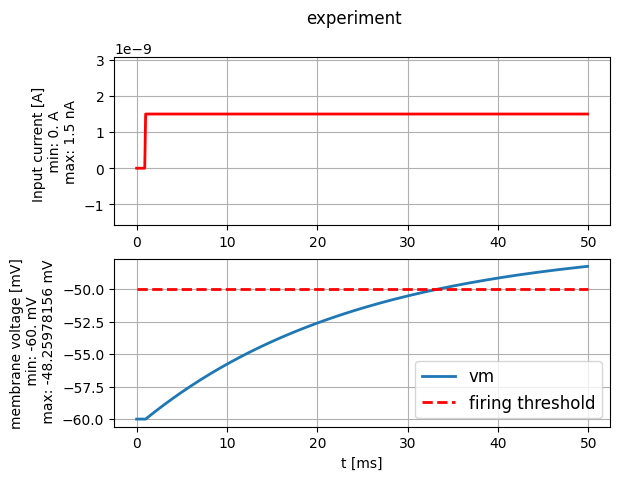

In [5]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=1, t_end=50, unit_time=b2.ms, amplitude= 1.5* b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current,firing_threshold=LIF.FIRING_THRESHOLD, title="experiment")

# print the parameters to the console and compare with your estimates
# LIF.print_obfuscated_parameters(random_parameters)

1.4. Exercise: Sinusoidal input current and subthreshold response
In the subthreshold regime (no spike), the LIF neuron is a linear system and the membrane voltage is a filtered version of the input current. In this exercise we study the properties of this linear system when it gets a sinusoidal stimulus.

1.4.1. Question
Create a sinusoidal input current (see example below) and inject it into the LIF neuron. Determine the phase and amplitude of the membrane voltage.

**given a  Sinusoidal input current and taken a high threshold value with small time steps**  
**we observe In the subthreshold regime (no spike)**

nr of spikes: 0


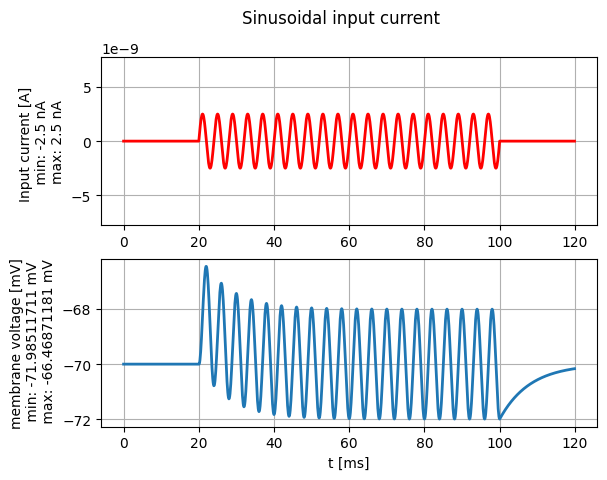

In [6]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

extra 

1.4.2. Question
For input frequencies between 10Hz and 1 kHz, plot the resulting amplitude of subthreshold oscillations of the membrane potential vs. input frequency.

1.4.3. Question
For input frequencies between 10Hz and 1 kHz, plot the resulting phase shift of subthreshold oscillations of the membrane potential vs. input frequency.

1.4.4. Question
To what type of filter (High-Pass, Low-Pass) does this correspond to?